<a href="https://colab.research.google.com/github/ronaldosaheki/Demo2/blob/master/%E2%93%82%EF%B8%8FRunning_Go_Lang_In_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (0) Preparation - Install Go Lang

In [1]:
# (1.1) run this cell first time using python runtime
!add-apt-repository ppa:longsleep/golang-backports -y
!apt update
!apt install golang-go
%env GOPATH=/root/go
!go get -u github.com/gopherdata/gophernotes
!cp ~/go/bin/gophernotes /usr/bin/
!mkdir /usr/local/share/jupyter/kernels/gophernotes
!cp ~/go/src/github.com/gopherdata/gophernotes/kernel/* \
       /usr/local/share/jupyter/kernels/gophernotes
# (1.2) then refresh, it will now use gophernotes. Skip to golang in later cells

Repository: 'deb https://ppa.launchpadcontent.net/longsleep/golang-backports/ubuntu/ jammy main'
Description:
Golang 1.8, 1.9, 1.10, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.20 and 1.21 PPA for Ubuntu
More info: https://launchpad.net/~longsleep/+archive/ubuntu/golang-backports
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/longsleep-ubuntu-golang-backports-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/longsleep-ubuntu-golang-backports-jammy.list
Adding key to /etc/apt/trusted.gpg.d/longsleep-ubuntu-golang-backports.gpg with fingerprint 52B59B1571A79DBC054901C0F6BC817356A3D45E
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRel

#(1) Get started with Go

In [2]:
!mkdir -p /content/example/hello
%cd /content/example/hello

/content/example/hello


In [3]:
!go mod init example/hello

go: creating new go.mod: module example/hello


In [4]:
file_name ='/content/example/hello/hello.go'
file_content = '''package main

import "fmt"

func main() {
    fmt.Println("Hello, World!")
}
'''
print(file_content,  file=open(file_name, 'w'))

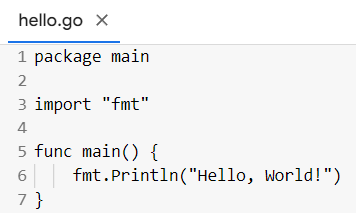

In [5]:
!go run .

Hello, World!


#(2) Create a Module

## Module: Greetings

In [6]:
!mkdir -p /content/example/greetings
%cd /content/example/greetings

/content/example/greetings


In [7]:
!go mod init example.com/greetings

go: creating new go.mod: module example.com/greetings


In [8]:
file_name ='/content/example/greetings/greetings.go'
file_content = '''package greetings

import "fmt"

// Hello returns a greeting for the named person.
func Hello(name string) string {
    // Return a greeting that embeds the name in a message.
    message := fmt.Sprintf("Hi, %v. Welcome!", name)
    return message
}
'''
print(file_content,  file=open(file_name, 'w'))

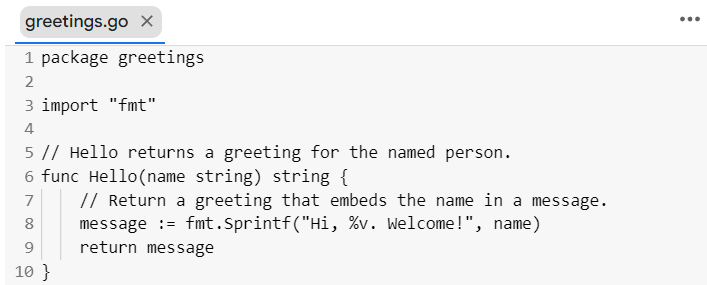

## Module: Hello

In [9]:
%cd /content/example/hello

/content/example/hello


In [10]:
file_name ='/content/example/hello/hello.go'
file_content = '''package main

import (
    "fmt"

    "example.com/greetings"
)

func main() {
    // Get a greeting message and print it.
    message := greetings.Hello("Gladys")
    fmt.Println(message)
}
'''
print(file_content,  file=open(file_name, 'w'))

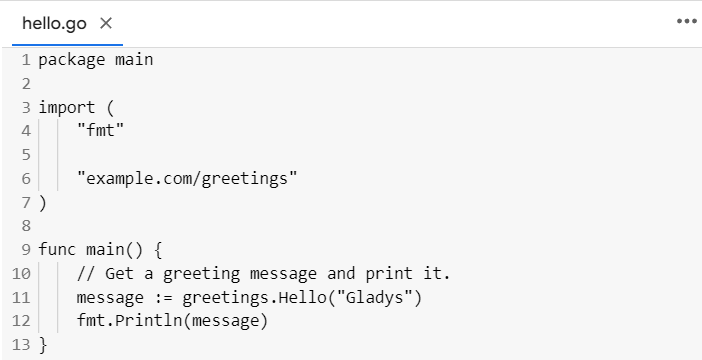

In [11]:
!go mod edit -replace example.com/greetings=../greetings

In [12]:
!go mod tidy

go: found example.com/greetings in example.com/greetings v0.0.0-00010101000000-000000000000


In [13]:
!go run .

Hi, Gladys. Welcome!
